In [12]:
from sklearn.model_selection import train_test_split
from Data.Dataset import LatentFMRIDataset
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [20]:
data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_UM1_merged'
test_ratio = 0.15
reduce_dim = 2
kernel = 'linear'

dataset = LatentFMRIDataset(data_dir=data_directory, reduced_dim=reduce_dim)
all_data_items = dataset.get_all_items()
X = all_data_items['X']
y = all_data_items['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

In [21]:
if not reduce_dim:
    X_train = X_train.reshape((X_train.shape[0], -1))
    X_test = X_test.reshape((X_test.shape[0], -1))

X_train.shape, X_test.shape

((45198, 2), (7977, 2))

In [22]:
model = SVC(kernel=kernel, C=1.0, class_weight='balanced', random_state=42, verbose=False)
model.fit(X=X_train, y=y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

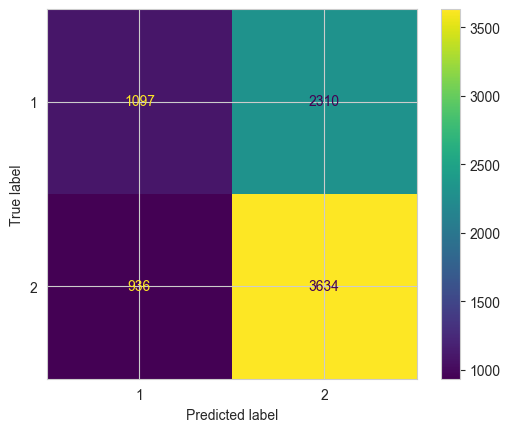

In [23]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, test_predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()

In [24]:
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-6),
recall = tp / (tp + fn + 1e-6),
precision = tp / (tp + fp + 1e-6)

accuracy, precision, recall

((0.5930801052283966,), 0.6113728128177367, (0.795185995449631,))

NameError: name 'scatter' is not defined

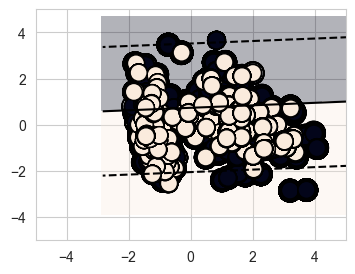

In [27]:
# Settings for plotting
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -5, 5, -5, 5
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot decision boundary and margins
common_params = {"estimator": model, "X": X_test, "ax": ax}
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="predict",
    plot_method="pcolormesh",
    alpha=0.3,
)
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1, 0, 1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)

# Plot bigger circles around samples that serve as support vectors
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=250,
    facecolors="none",
    edgecolors="k",
)
# Plot samples by color and add legend
ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")

_ = plt.show()